In [131]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [132]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np
import string
import matplotlib.pyplot as plt

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2. (idf is the logarithm on slide 69 of Lecture 6.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

In [133]:
Q_array = ['mouse', 'cat', 'pet', 'mammals']
terms = ['cat', 'dog', 'mammals', 'mouse', 'pet']
D1 = "Cat is a pet, dog is a pet, and mouse may be a pet too.".lower()
D2 = "Cat, dog and mouse are all mammals.".lower()
D3 = "Cat and dog get along well, but cat may eat a mouse.".lower()
term_frequency = {'cat': 0.05, 'dog': 0.2, 'mammals': 0.02, 'mouse': 0.1, 'pet': 0.6}


def calculate_idf_terms(term_frequency):
    terms_idf = {}
    
    for term, freq in term_frequency.items():
        idf_score = np.log2(1 / freq)
        terms_idf[term] = idf_score
    
    return terms_idf

def get_words(sentence):
    """ Get all words out of sentence which is a string and lower all words and remove punctuation
    params:
        sentence: string
    """
    # lower case
    sentence = sentence.lower()
    
    # remove punctuation
    exclude = set(string.punctuation)
    sentence_clean = ''.join(ch for ch in sentence if ch not in exclude)
    
    # create array of words from sentence 
    word_array = sentence_clean.split()
    
    return word_array

def calculate_term_freq(terms, document):
    term_freq_dict = {}
    
    for term in terms:
        n_id = document.count(term)
        n_d = len(document)
        
        term_freq = n_id / n_d
        term_freq_dict[term] = round(term_freq, 4)
        
    return term_freq_dict
    
def calculate_idf_weighted(terms, term_frequency, term_idf):
    weighted_idf_dict = {}
    
    for term in terms:
        weighted_idf_dict[term] = term_frequency[term] * term_idf[term]
    
    return weighted_idf_dict

def cosine_similarity(terms, query, doc):
    nominator = np.sum( [query[term]*doc[term] for term in terms] )
    
    denominator = np.sqrt( np.sum([query[term]**2 for term in terms]) ) * np.sqrt( np.sum([doc[term]**2 for term in terms]) )
    
    score = nominator / denominator
    return score

In [134]:
# a)

idf_terms_dict = calculate_idf_terms(term_frequency)
print("idf of terms: ")
idf_terms_dict

idf of terms: 


{'cat': 4.321928094887363,
 'dog': 2.321928094887362,
 'mammals': 5.643856189774724,
 'mouse': 3.321928094887362,
 'pet': 0.7369655941662062}

In [135]:
# b)

# split sentences into word arrays
D1_array = get_words(D1)
D2_array = get_words(D2)
D3_array = get_words(D3)

term_freq_Q  = calculate_term_freq(terms, Q_array)
term_freq_D1 = calculate_term_freq(terms, D1_array)
term_freq_D2 = calculate_term_freq(terms, D2_array)
term_freq_D3 = calculate_term_freq(terms, D3_array)

print("term frequency Q: ", term_freq_Q)
print("term frequency D1: ", term_freq_D1)
print("term frequency D2: ", term_freq_D2)
print("term frequency D3: ", term_freq_D3)

term frequency Q:  {'cat': 0.25, 'dog': 0.0, 'mammals': 0.25, 'mouse': 0.25, 'pet': 0.25}
term frequency D1:  {'cat': 0.0667, 'dog': 0.0667, 'mammals': 0.0, 'mouse': 0.0667, 'pet': 0.2}
term frequency D2:  {'cat': 0.1429, 'dog': 0.1429, 'mammals': 0.1429, 'mouse': 0.1429, 'pet': 0.0}
term frequency D3:  {'cat': 0.1667, 'dog': 0.0833, 'mammals': 0.0, 'mouse': 0.0833, 'pet': 0.0}


In [136]:
# c)

# tf-idf weighted word occurrence
weighted_idf_Q  = calculate_idf_weighted(terms, term_freq_Q,  idf_terms_dict)
weighted_idf_D1 = calculate_idf_weighted(terms, term_freq_D1, idf_terms_dict)
weighted_idf_D2 = calculate_idf_weighted(terms, term_freq_D2, idf_terms_dict)
weighted_idf_D3 = calculate_idf_weighted(terms, term_freq_D3, idf_terms_dict)

print("weighted idf Q", weighted_idf_Q)
print("weighted idf D1", weighted_idf_D1)
print("weighted idf D2", weighted_idf_D2)
print("weighted idf D3", weighted_idf_D3)

weighted idf Q {'cat': 1.0804820237218407, 'dog': 0.0, 'mammals': 1.410964047443681, 'mouse': 0.8304820237218405, 'pet': 0.18424139854155155}
weighted idf D1 {'cat': 0.28827260392898707, 'dog': 0.15487260392898705, 'mammals': 0.0, 'mouse': 0.22157260392898703, 'pet': 0.14739311883324124}
weighted idf D2 {'cat': 0.6176035247594042, 'dog': 0.33180352475940406, 'mammals': 0.8065070495188081, 'mouse': 0.474703524759404, 'pet': 0.0}
weighted idf D3 {'cat': 0.7204654134177233, 'dog': 0.19341661030411728, 'mammals': 0.0, 'mouse': 0.27671661030411726, 'pet': 0.0}


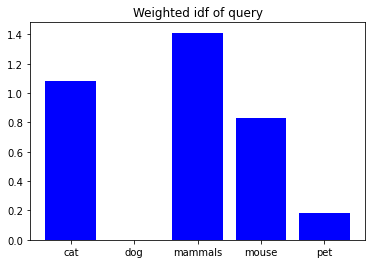

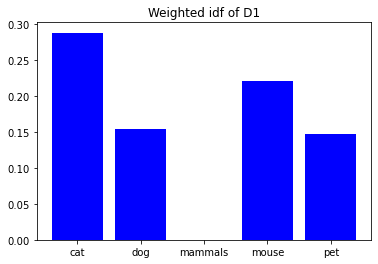

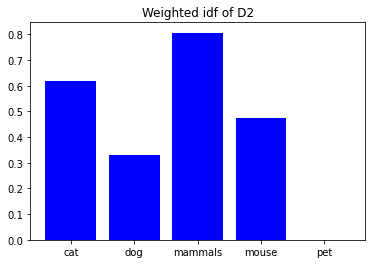

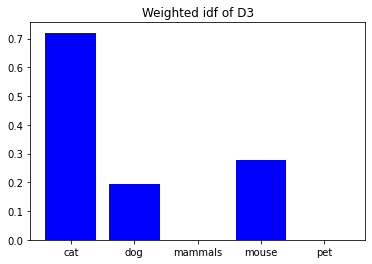

In [137]:
# plot histograms

plt.bar(weighted_idf_Q.keys(), weighted_idf_Q.values(), color='b')
plt.title('Weighted idf of query')
plt.show()

plt.bar(weighted_idf_D1.keys(), weighted_idf_D1.values(), color='b')
plt.title('Weighted idf of D1')
plt.show()

plt.bar(weighted_idf_D2.keys(), weighted_idf_D2.values(), color='b')
plt.title('Weighted idf of D2')
plt.show()

plt.bar(weighted_idf_D3.keys(), weighted_idf_D3.values(), color='b')
plt.title('Weighted idf of D3')
plt.show()


In [138]:
# d)

sim_Q_D1 = cosine_similarity(terms, weighted_idf_Q, weighted_idf_D1)
sim_Q_D2 = cosine_similarity(terms, weighted_idf_Q, weighted_idf_D2)
sim_Q_D3 = cosine_similarity(terms, weighted_idf_Q, weighted_idf_D3)

print("cosine similarity Q and D1: ", sim_Q_D1)
print("cosine similarity Q and D2: ", sim_Q_D2)
print("cosine similarity Q and D3: ", sim_Q_D3)

cosine similarity Q and D1:  0.6289067101021564
cosine similarity Q and D2:  0.9546948111493487
cosine similarity Q and D3:  0.6431752760562872


e)

Relative ranking of the documents:

D1: 0.63

D2: 0.95

D3: 0.64

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particularcase.

Type your answer here:

In Lecture 06 slide 67 the scoring retrieval quality is addressed. Accoridng to lecture the definition for recall and precision are the following:

* precision = #relevant / #returned
* recall = #relevant / #total relevant

Given in the description:
* #relevant : from the retrieved images 300 (car images) are relevant
* #returned : the automatic retrieval system retrieves 300 (car) + 50 (other) = 350
* #total relevant : in total there are 500 car images in the database

Solution:

precision = 300 / 350 = 0.8571

recall = 300 / 500 = 0.6

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Type your answers here: 